### imports

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

from sklearn.cross_validation import train_test_split

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn import cross_validation

import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot    
import plotly.graph_objs as go
import pandas as pd

import seaborn as sns

Using TensorFlow backend.
/home/user/Documents/stackRoute/myPython3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### load the dataset
#### First trying with all 10 categories

In [2]:
red_df = pd.read_csv("winequality-red.csv",sep=";")
train1 = red_df[:int(0.8 * len(red_df))]
print(len(train1))
test1 = red_df[int(0.8 * len(red_df)):]
print(len(test1))
red_df.head(2)

1279
320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [3]:
# Split test train data
x_train1 = train1.iloc[:, :-1].values
x_test1 = test1.iloc[:, :-1].values
y_train1 = train1.iloc[:, -1:].values
y_test1 = test1.iloc[:, -1:].values


In [4]:
# Fixing the parameters
batch_size1 = 128
num_classes1 = 10
epochs1 = 20

In [5]:
# Converting to categories
y_train_cat1 = keras.utils.to_categorical(y_train1, num_classes1)
y_test_cat1 = keras.utils.to_categorical(y_test1, num_classes1)
y_train_cat1[1]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [6]:
# Defining the model
model0 = Sequential()

In [7]:
model0.add(Dense(600, activation='relu', input_shape=(11,)))
model0.add(Dense(500, activation='relu'))
model0.add(Dense(10, activation='softmax'))

In [8]:
model0.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics = ['accuracy'])

In [9]:
model0.fit(x_train1, 
          y_train_cat1, 
          batch_size=batch_size1, 
          epochs=epochs1, 
          validation_split = .2,
          verbose=2)

Train on 1023 samples, validate on 256 samples
Epoch 1/20
0s - loss: 5.1045 - acc: 0.3196 - val_loss: 7.9441 - val_acc: 0.2539
Epoch 2/20
0s - loss: 3.7195 - acc: 0.4350 - val_loss: 2.0836 - val_acc: 0.4258
Epoch 3/20
0s - loss: 2.0520 - acc: 0.4428 - val_loss: 2.6151 - val_acc: 0.5078
Epoch 4/20
0s - loss: 1.9594 - acc: 0.4770 - val_loss: 2.2293 - val_acc: 0.2148
Epoch 5/20
0s - loss: 1.8467 - acc: 0.4585 - val_loss: 1.5323 - val_acc: 0.4844
Epoch 6/20
0s - loss: 1.5680 - acc: 0.4702 - val_loss: 2.0418 - val_acc: 0.5000
Epoch 7/20
0s - loss: 1.9113 - acc: 0.4477 - val_loss: 1.6691 - val_acc: 0.3242
Epoch 8/20
0s - loss: 1.4009 - acc: 0.4702 - val_loss: 3.1469 - val_acc: 0.2578
Epoch 9/20
0s - loss: 1.3823 - acc: 0.4555 - val_loss: 1.7247 - val_acc: 0.4883
Epoch 10/20
0s - loss: 1.3964 - acc: 0.4829 - val_loss: 1.4203 - val_acc: 0.4844
Epoch 11/20
0s - loss: 1.3035 - acc: 0.4633 - val_loss: 1.3488 - val_acc: 0.4609
Epoch 12/20
0s - loss: 1.1589 - acc: 0.5103 - val_loss: 1.3097 - val_ac

In [10]:
# Finding the correlation to see which features really matter to the output
correlation_matrix = red_df.corr()

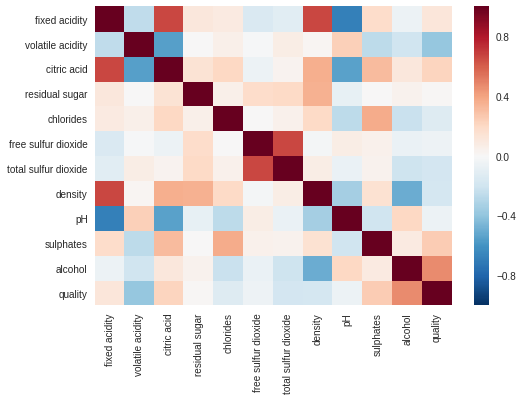

In [11]:
correlation_plot = sns.heatmap(correlation_matrix,
            xticklabels = correlation_matrix.columns.values,
            yticklabels = correlation_matrix.columns.values)
for label in correlation_plot.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.figure(figsize=(12,12))
plt.show()

In [12]:
# The above method of giving wine quality a score between 1 to 10 doesn't provide a good prediction accuracy.
# So splitting the categories to bad,average,good.

In [29]:
white_wine = pd.read_csv("winequality-white.csv", sep=";")
white_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [30]:
# defining a function to categorise data
def categorize(a):
    if a >= 7:
        return 2
    if (a > 3 and a < 7):
        return 1
    if (a <= 3):
        return 0

In [31]:
white_wine["cat_quality"] = white_wine["quality"].apply(categorize)
white_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cat_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [32]:
# Deleting the quality column
white_wine.drop("quality",axis = 1,inplace = True)

In [33]:
white_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cat_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,1


In [34]:
number_class2 = 3
epochs2 = 10
batch_size2 = 128

In [42]:
#test-train split of the data
train, test = train_test_split(white_wine, train_size = 0.8)
#train = white_wine[:int(0.8 * len(white_wine))]
#test = white_wine[int(0.8 * len(white_wine)):]
x_train = train.iloc[:, :-1].values
x_test = test.iloc[:, :-1].values
y_train = train.iloc[:, -1:].values
y_test = test.iloc[:, -1:].values
x_train = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.mean()) / (x_test.max() - x_test.min())

In [43]:
#converting data to numpy array
y_train_cat = keras.utils.to_categorical(y_train, number_class2)
y_test_cat = keras.utils.to_categorical(y_test, number_class2)
y_train_cat

array([[ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

In [44]:
# A function to plot the data
def plotting(models):
    plt.plot(models.history['acc'])
    plt.plot(models.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    plt.plot(models.history['loss'])
    plt.plot(models.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Train on 3134 samples, validate on 784 samples
Epoch 1/10
0s - loss: 0.6197 - acc: 0.7629 - val_loss: 0.5636 - val_acc: 0.7768
Epoch 2/10
0s - loss: 0.5384 - acc: 0.7853 - val_loss: 0.5651 - val_acc: 0.7768
Epoch 3/10
0s - loss: 0.5350 - acc: 0.7853 - val_loss: 0.5697 - val_acc: 0.7768
Epoch 4/10
0s - loss: 0.5297 - acc: 0.7853 - val_loss: 0.5739 - val_acc: 0.7768
Epoch 5/10
0s - loss: 0.5237 - acc: 0.7853 - val_loss: 0.5736 - val_acc: 0.7768
Epoch 6/10
0s - loss: 0.5266 - acc: 0.7853 - val_loss: 0.5497 - val_acc: 0.7768
Epoch 7/10
0s - loss: 0.5203 - acc: 0.7853 - val_loss: 0.5457 - val_acc: 0.7768
Epoch 8/10
0s - loss: 0.5148 - acc: 0.7853 - val_loss: 0.5479 - val_acc: 0.7768
Epoch 9/10
0s - loss: 0.5155 - acc: 0.7853 - val_loss: 0.5455 - val_acc: 0.7768
Epoch 10/10
0s - loss: 0.5140 - acc: 0.7853 - val_loss: 0.5829 - val_acc: 0.7742


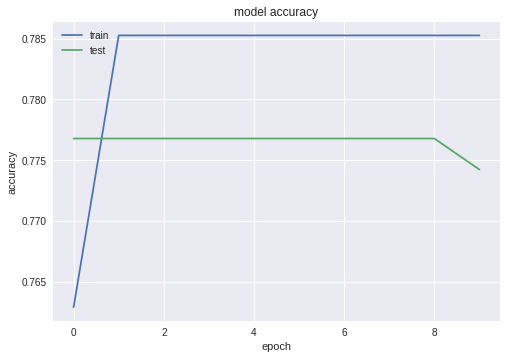

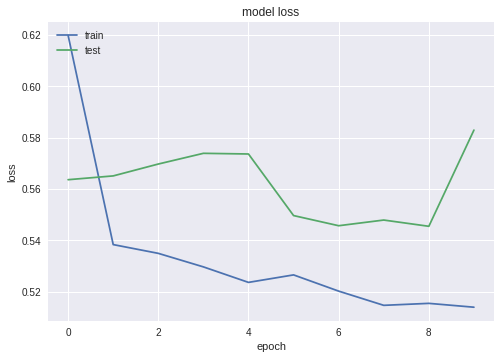

In [45]:
# Model 1 with 1 hidden layer
model1 = Sequential()
model1.add(Dense(600, activation='relu', input_shape=(11,)))
model1.add(Dense(500, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_1 = model1.fit(x_train, y_train_cat, batch_size=batch_size2, epochs=epochs2, validation_split = .2, verbose=2)
plotting(model_1)

Train on 3134 samples, validate on 784 samples
Epoch 1/10
0s - loss: 0.5131 - acc: 0.7856 - val_loss: 0.5555 - val_acc: 0.7768
Epoch 2/10
0s - loss: 0.5119 - acc: 0.7853 - val_loss: 0.5400 - val_acc: 0.7768
Epoch 3/10
0s - loss: 0.5090 - acc: 0.7853 - val_loss: 0.5432 - val_acc: 0.7768
Epoch 4/10
0s - loss: 0.5089 - acc: 0.7853 - val_loss: 0.5348 - val_acc: 0.7768
Epoch 5/10
0s - loss: 0.5034 - acc: 0.7859 - val_loss: 0.5400 - val_acc: 0.7768
Epoch 6/10
0s - loss: 0.5124 - acc: 0.7849 - val_loss: 0.5484 - val_acc: 0.7742
Epoch 7/10
0s - loss: 0.5032 - acc: 0.7843 - val_loss: 0.5532 - val_acc: 0.7742
Epoch 8/10
0s - loss: 0.5066 - acc: 0.7817 - val_loss: 0.5383 - val_acc: 0.7768
Epoch 9/10
0s - loss: 0.5024 - acc: 0.7849 - val_loss: 0.5301 - val_acc: 0.7768
Epoch 10/10
0s - loss: 0.5031 - acc: 0.7853 - val_loss: 0.5337 - val_acc: 0.7768


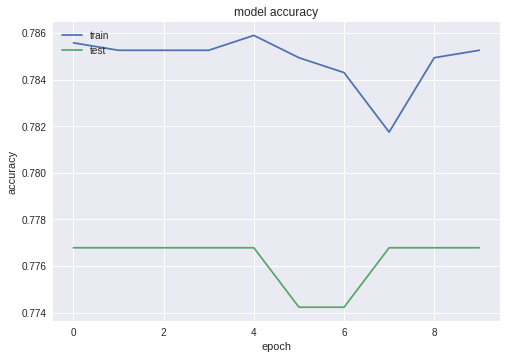

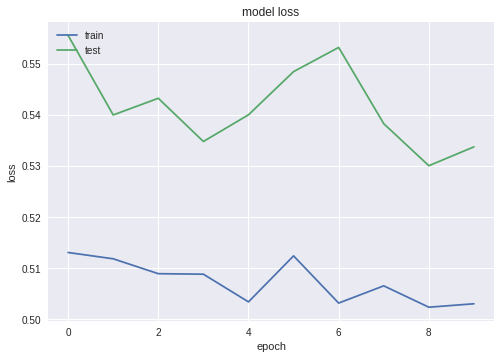

In [46]:
# Model 2 with 2 hidden layer
model2 = Sequential()
model2.add(Dense(600, activation='relu', input_shape=(11,)))
model2.add(Dense(500, activation='relu'))
model2.add(Dense(400, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_2 = model1.fit(x_train, y_train_cat, batch_size=batch_size2, epochs=epochs2, validation_split = .2, verbose=2)
plotting(model_2)

Train on 3134 samples, validate on 784 samples
Epoch 1/10
0s - loss: 0.5016 - acc: 0.7837 - val_loss: 0.5287 - val_acc: 0.7768
Epoch 2/10
0s - loss: 0.4993 - acc: 0.7859 - val_loss: 0.5475 - val_acc: 0.7742
Epoch 3/10
0s - loss: 0.5036 - acc: 0.7849 - val_loss: 0.5576 - val_acc: 0.7768
Epoch 4/10
0s - loss: 0.5007 - acc: 0.7853 - val_loss: 0.5479 - val_acc: 0.7742
Epoch 5/10
0s - loss: 0.4986 - acc: 0.7853 - val_loss: 0.5427 - val_acc: 0.7781
Epoch 6/10
0s - loss: 0.4958 - acc: 0.7853 - val_loss: 0.5747 - val_acc: 0.7577
Epoch 7/10
0s - loss: 0.5021 - acc: 0.7824 - val_loss: 0.5280 - val_acc: 0.7768
Epoch 8/10
0s - loss: 0.4936 - acc: 0.7875 - val_loss: 0.5599 - val_acc: 0.7768
Epoch 9/10
0s - loss: 0.5000 - acc: 0.7853 - val_loss: 0.5272 - val_acc: 0.7768
Epoch 10/10
0s - loss: 0.4973 - acc: 0.7846 - val_loss: 0.5309 - val_acc: 0.7781


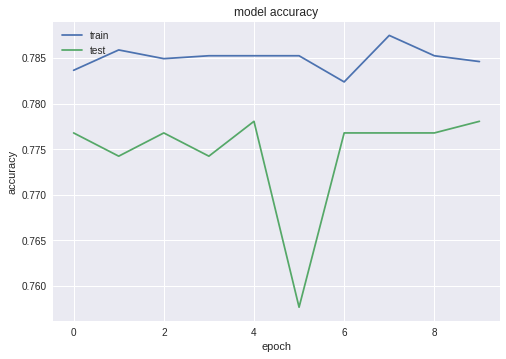

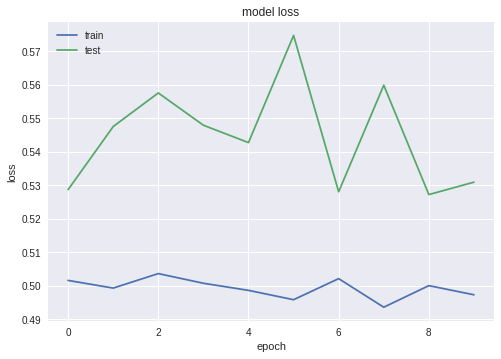

In [47]:
# Model 3 with 3 hidden layer
model3 = Sequential()
model3.add(Dense(600, activation='relu', input_shape=(11,)))
model3.add(Dense(500, activation='relu'))
model3.add(Dense(400, activation='relu'))
model3.add(Dense(300, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_3 = model1.fit(x_train, y_train_cat, batch_size=batch_size2, epochs=epochs2, validation_split = .2, verbose=2)
plotting(model_3)

Train on 3134 samples, validate on 784 samples
Epoch 1/10
0s - loss: 0.4945 - acc: 0.7859 - val_loss: 0.5242 - val_acc: 0.7781
Epoch 2/10
0s - loss: 0.4939 - acc: 0.7872 - val_loss: 0.5417 - val_acc: 0.7768
Epoch 3/10
0s - loss: 0.4957 - acc: 0.7875 - val_loss: 0.5200 - val_acc: 0.7768
Epoch 4/10
0s - loss: 0.4926 - acc: 0.7843 - val_loss: 0.5197 - val_acc: 0.7781
Epoch 5/10
0s - loss: 0.4910 - acc: 0.7862 - val_loss: 0.5287 - val_acc: 0.7768
Epoch 6/10
0s - loss: 0.4955 - acc: 0.7833 - val_loss: 0.5257 - val_acc: 0.7768
Epoch 7/10
0s - loss: 0.4904 - acc: 0.7840 - val_loss: 0.5387 - val_acc: 0.7628
Epoch 8/10
0s - loss: 0.4910 - acc: 0.7827 - val_loss: 0.5621 - val_acc: 0.7768
Epoch 9/10
0s - loss: 0.4883 - acc: 0.7837 - val_loss: 0.5121 - val_acc: 0.7755
Epoch 10/10
0s - loss: 0.4886 - acc: 0.7843 - val_loss: 0.5158 - val_acc: 0.7768


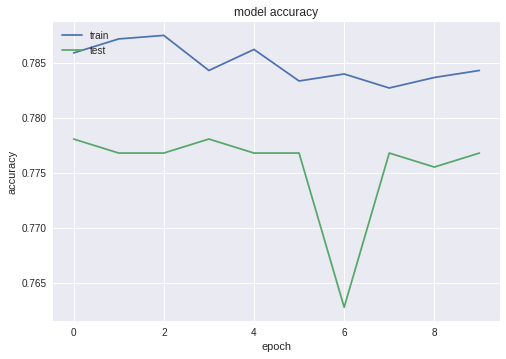

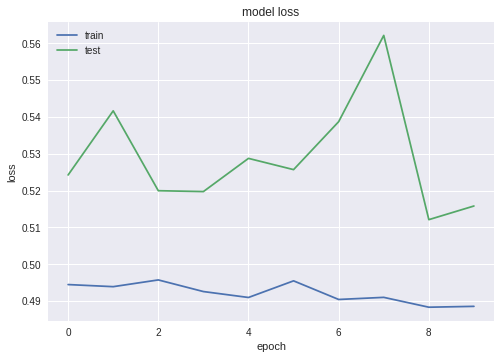

In [48]:
# Model 4 with 4 hidden layer
model4 = Sequential()
model4.add(Dense(1000, activation='relu', input_shape=(11,)))
model4.add(Dense(800, activation='relu'))
model4.add(Dense(600, activation='relu'))
model4.add(Dense(400, activation='relu'))
model4.add(Dense(200, activation='relu'))
model4.add(Dense(3, activation='softmax'))
model4.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_4 = model1.fit(x_train, y_train_cat, batch_size=batch_size2, epochs=epochs2, validation_split = .2, verbose=2)
plotting(model_4)

Train on 3134 samples, validate on 784 samples
Epoch 1/10
0s - loss: 0.4884 - acc: 0.7849 - val_loss: 0.5435 - val_acc: 0.7704
Epoch 2/10
0s - loss: 0.4842 - acc: 0.7837 - val_loss: 0.5846 - val_acc: 0.7143
Epoch 3/10
0s - loss: 0.4917 - acc: 0.7849 - val_loss: 0.5410 - val_acc: 0.7768
Epoch 4/10
0s - loss: 0.4880 - acc: 0.7865 - val_loss: 0.5226 - val_acc: 0.7704
Epoch 5/10
0s - loss: 0.4851 - acc: 0.7837 - val_loss: 0.5209 - val_acc: 0.7768
Epoch 6/10
0s - loss: 0.4875 - acc: 0.7837 - val_loss: 0.5111 - val_acc: 0.7768
Epoch 7/10
0s - loss: 0.4842 - acc: 0.7802 - val_loss: 0.5671 - val_acc: 0.7768
Epoch 8/10
0s - loss: 0.4887 - acc: 0.7846 - val_loss: 0.5079 - val_acc: 0.7768
Epoch 9/10
0s - loss: 0.4871 - acc: 0.7849 - val_loss: 0.5038 - val_acc: 0.7793
Epoch 10/10
0s - loss: 0.4789 - acc: 0.7891 - val_loss: 0.5033 - val_acc: 0.7768


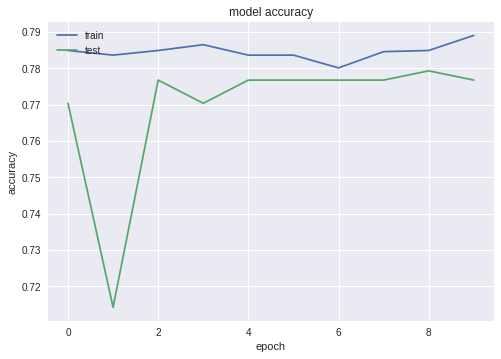

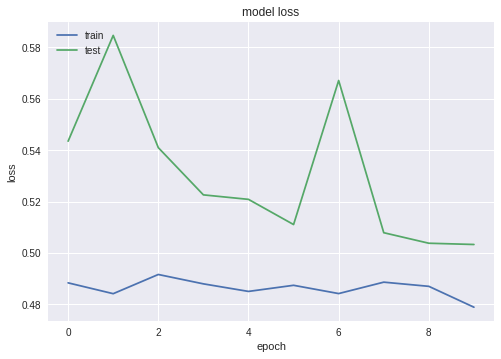

In [49]:
# Model 5 with 5 hidden layer
model5 = Sequential()
model5.add(Dense(1000, activation='relu', input_shape=(11,)))
model5.add(Dense(800, activation='relu'))
model5.add(Dense(600, activation='relu'))
model5.add(Dense(500, activation='relu'))
model5.add(Dense(400, activation='relu'))
model5.add(Dense(200, activation='relu'))
model5.add(Dense(3, activation='softmax'))
model5.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics = ['accuracy'])
model_5 = model1.fit(x_train, y_train_cat, batch_size=batch_size2, epochs=epochs2, validation_split = .2, verbose=2)
plotting(model_5)